In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline

mpl.style.use( 'ggplot' )
fig = plt.figure(figsize=(100, 100)) 
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 999

In [2]:
df = pd.read_csv('result_ozone_melbourne_2016-2018.csv')

In [3]:
df.head()

Y        X  data_payload_id       instance_datetime  \
0 -37.8  144.967          1806346  2018/02/01 00:00:00+00   
1 -37.8  144.967          1806347  2018/02/01 00:00:00+00   
2 -37.8  144.967          1806357  2018/02/01 00:00:00+00   
3 -37.8  144.967          1806348  2018/02/01 00:00:00+00   
4 -37.8  144.967          1806371  2018/02/01 00:00:00+00   

                                                 url agency platform_type  \
0  https://woudc.org/archive/Archive-NewFormat/To...    ABM           STN   
1  https://woudc.org/archive/Archive-NewFormat/To...    ABM           STN   
2  https://woudc.org/archive/Archive-NewFormat/To...    ABM           STN   
3  https://woudc.org/archive/Archive-NewFormat/To...    ABM           STN   
4  https://woudc.org/archive/Archive-NewFormat/To...    ABM           STN   

   platform_id platform_name gaw_id   ...    daily_columno3 daily_stddevo3  \
0          253     Melbourne    MBN   ...             293.3            2.9   
1          253     Melbourne    MBN   ...             284.5            5.8   
2          253     Melbourne    MBN   ...             293.5            6.4   
3          253     Melbourne    MBN   ...             274.3            6.1   
4          253     Melbourne    MBN   ...             268.9            6.0   

   daily_utc_begin daily_utc_end  daily_utc_mean  daily_nobs  daily_mmu  \
0             0.63          6.13             NaN           3        NaN   
1            -2.13          7.47             NaN          12        NaN   
2             0.39          2.44             NaN           2        NaN   
3             0.28          7.48             NaN           3        NaN   
4            -1.98          6.98             NaN           9        NaN   

  daily_columnso2  latest_observation  country  
0             NaN                   0      AUS  
1             NaN                   0      AUS  
2             NaN                   0      AUS  
3             NaN                   0      AUS  
4             NaN                   0      AUS  

[5 rows x 30 columns]

In [124]:
df1 = df.loc[:,['daily_date', 'daily_columno3']]

In [125]:
df1.head()

daily_date  daily_columno3
0  2018-02-02           293.3
1  2018-02-03           284.5
2  2018-02-13           293.5
3  2018-02-04           274.3
4  2018-02-27           268.9

In [126]:
df1 = df1.sort_values('daily_date').reset_index(drop=True)

In [127]:
df1.head(10)

daily_date  daily_columno3
0  2016-01-01           278.0
1  2016-01-02           295.4
2  2016-01-03           295.0
3  2016-01-04           290.7
4  2016-01-05           294.0
5  2016-01-06           289.0
6  2016-01-07           287.0
7  2016-01-08           266.3
8  2016-01-09           275.5
9  2016-01-10           280.0

In [128]:
df1.describe()

daily_columno3
count      694.000000
mean       300.445389
std         30.477159
min        244.600000
25%        276.700000
50%        293.300000
75%        321.000000
max        405.500000

In [129]:
df1.shape

(694, 2)

In [130]:
df1.dtypes

daily_date         object
daily_columno3    float64
dtype: object

In [131]:
df1.daily_date=pd.to_datetime(df1.daily_date,format="%Y-%m-%d")

In [132]:
df1.dtypes

daily_date        datetime64[ns]
daily_columno3           float64
dtype: object

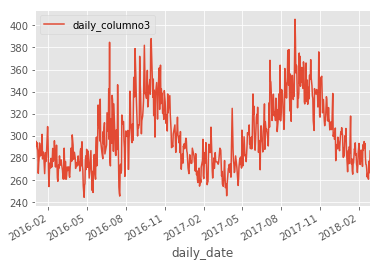

In [133]:
df1.plot(x='daily_date', y='daily_columno3')

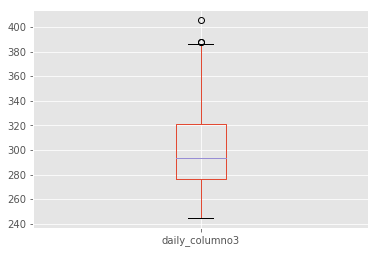

In [134]:
df1.daily_columno3.plot.box()

In [176]:
df1.tail()

daily_date  daily_columno3
689 2018-02-24           261.0
690 2018-02-25           277.2
691 2018-02-26           266.8
692 2018-02-27           268.9
693 2018-02-28           286.5

In [181]:
idx = pd.date_range(min(df1.daily_date), max(df1.daily_date))

In [184]:
df2 = df1.set_index('daily_date')

In [189]:
df3 = df2.reindex(idx,fill_value=np.nan)

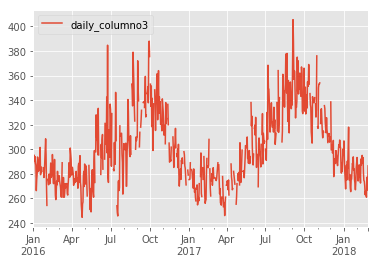

In [190]:
df3.plot()

In [195]:
df3_filled_nan = df3.fillna(method='ffill')

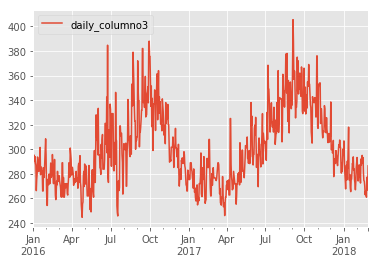

In [198]:
df3_filled_nan.plot()

# Mean average smoothing

In [199]:
rolling = df3_filled_nan.rolling(window=5, center=True)
df3_filled_nan_rolling = rolling.mean()

In [200]:
df3_filled_nan_rolling.head()

daily_columno3
2016-01-01             NaN
2016-01-02             NaN
2016-01-03          290.62
2016-01-04          292.82
2016-01-05          291.14

In [201]:
df3_filled_nan_rolling.reset_index(inplace=True)

In [206]:
df3_filled_nan_rolling.rename(columns={'index':'daily_date'},inplace=True)


In [207]:
df3_filled_nan_rolling.head()

daily_date  daily_columno3
0 2016-01-01             NaN
1 2016-01-02             NaN
2 2016-01-03          290.62
3 2016-01-04          292.82
4 2016-01-05          291.14

In [210]:
df3_filled_nan_rolling.loc[(df3_filled_nan_rolling.daily_date >= '2016-01-01')&(df3_filled_nan_rolling.daily_date <= '2016-12-31')].reset_index(drop=True).shape

(366, 2)

In [211]:
df4 = df3_filled_nan_rolling.loc[(df3_filled_nan_rolling.daily_date >= '2017-01-01')&(df3_filled_nan_rolling.daily_date <= '2017-12-31')].reset_index(drop=True)

In [227]:
df4.shape

(365, 5)

In [220]:
def roundOzone(x):
    if x <= 270:
        return 250
    elif x > 270 and x <=310:
        return 290
    elif x>310 and x<= 351:
        return 331
    elif x>351 and x <=390:
        return 370
    else:
        return 410

In [221]:
df4['roundOzone'] = df4['daily_columno3'].map(lambda x: roundOzone(x))
df4['month'] = df4['daily_date'].map(lambda x: x.month)
df4['day'] = df4['daily_date'].map(lambda x: x.day)

In [228]:
df4.head()

daily_date  daily_columno3  roundOzone  month  day
0 2017-01-01          278.32         290      1    1
1 2017-01-02          276.84         290      1    2
2 2017-01-03          278.84         290      1    3
3 2017-01-04          280.84         290      1    4
4 2017-01-05          283.58         290      1    5

In [229]:
df5 = df4.loc[:,["month",'day','roundOzone']] 

In [230]:
df5.head()

month  day  roundOzone
0      1    1         290
1      1    2         290
2      1    3         290
3      1    4         290
4      1    5         290

In [233]:
df3_filled_nan_rolling.loc[df3_filled_nan_rolling.daily_date =='2016-02-29']

daily_date  daily_columno3
59 2016-02-29          276.52

In [235]:
df3_temp = pd.DataFrame({'month':2,'day':29,'roundOzone':290},index=[0])

In [236]:
df3_temp

day  month  roundOzone
0   29      2         290

In [239]:
df5 = df5.append(df3_temp,ignore_index=True)

In [240]:
df5.shape

(366, 3)

# Write to csv file

In [241]:
df5.to_csv('OzoneLUT.csv',encoding='UTF-8')

In [242]:
df0 = pd.read_csv('OzoneLUT.csv')

In [243]:
df0.dtypes

Unnamed: 0    int64
day           int64
month         int64
roundOzone    int64
dtype: object

In [244]:
%pwd

u'/Users/jibusi/Downloads/winterproject/code/sen2corPocessChain/ozone'

In [54]:
df1['Month_Day'] = df1['daily_date'].map(lambda x: '%d-%d'%(x.month,x.day))

In [86]:
df1['year'] = df1['daily_date'].map(lambda x: str(x.year))

In [87]:
df1.tail()

daily_date  daily_columno3 Month_Day  year
689 2018-02-24           261.0      2-24  2018
690 2018-02-25           277.2      2-25  2018
691 2018-02-26           266.8      2-26  2018
692 2018-02-27           268.9      2-27  2018
693 2018-02-28           286.5      2-28  2018

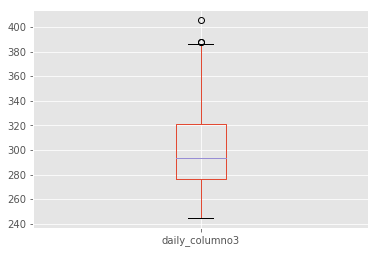

In [88]:
df1.daily_columno3.plot.box()

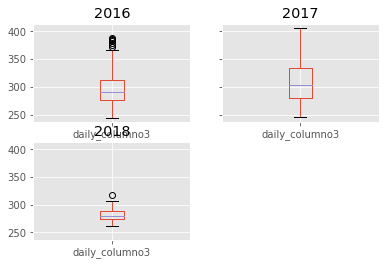

In [95]:
plt.figure()
bp = df1.groupby('year').boxplot()

In [75]:
df2 = df1.loc[:,['Month_Day','daily_columno3']]

In [80]:
result = df2.groupby('Month_Day').mean().reset_index()

In [81]:
result.head(20)

Month_Day  daily_columno3
0        1-1      286.600000
1       1-10      282.266667
2       1-11      284.500000
3       1-12      287.133333
4       1-13      294.666667
5       1-14      274.100000
6       1-15      274.233333
7       1-16      278.233333
8       1-17      277.000000
9       1-18      267.600000
10      1-19      278.300000
11       1-2      292.500000
12      1-20      276.233333
13      1-21      278.666667
14      1-22      271.600000
15      1-23      270.000000
16      1-24      277.400000
17      1-25      275.266667
18      1-26      277.666667
19      1-27      278.000000

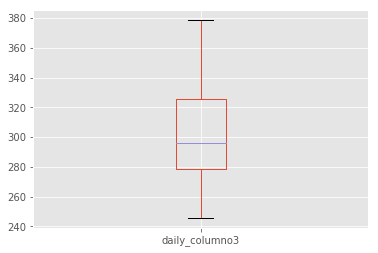

In [97]:
result.plot.box()

In [84]:
result.describe()

daily_columno3
count      364.000000
mean       302.468681
std         28.797194
min        245.700000
25%        278.729167
50%        295.975000
75%        325.725000
max        378.500000

In [100]:
# less 270
len(df1.loc[df1.daily_columno3<270])

90

In [104]:
# 270-290
len(df1.loc[(df1.daily_columno3>=270) & (df1.daily_columno3<290)])

229

In [ ]:
# 